In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [160]:
df = pd.read_csv('output/summeval/summeval_merged/mis_seed_imp_mmodes.csv') # Work oké
# df = pd.read_csv('output/summeval/summeval_merged/mis_seed_imp.csv')


In [161]:
df

,filename,metadata/Embedding model,metadata/Decoding config,metadata/Date,metadata/Model name,metadata/Dataset name,I(text -> summary),H(summary),H(summary|text),I(summary -> text),H(text),H(text|summary)
0,M12,paraphrase-MiniLM-L6-v2,NaN,NaN,M12,SummEval,0,0,0,34.373776,49.984611,15.610835
1,M9,paraphrase-MiniLM-L6-v2,NaN,NaN,M9,SummEval,0,0,0,32.557577,49.984611,17.427034
2,M6,paraphrase-MiniLM-L6-v2,NaN,NaN,M6,SummEval,0,0,0,38.463190,49.984611,11.521421
3,M21,paraphrase-MiniLM-L6-v2,NaN,NaN,M21,SummEval,0,0,0,35.782243,49.985871,14.203627
4,M15,paraphrase-MiniLM-L6-v2,NaN,NaN,M15,SummEval,0,0,0,33.977482,49.984611,16.007129
5,M0,paraphrase-MiniLM-L6-v2,NaN,NaN,M0,SummEval,0,0,0,38.052595,49.984611,11.932016
6,M4,paraphrase-MiniLM-L6-v2,NaN,NaN,M4,SummEval,0,0,0,38.108990,49.984649,11.875660
7,M5,paraphrase-MiniLM-L6-v2,NaN,NaN,M5,SummEval,0,0,0,37.941800,49.983509,12.041710
8,M13,paraphrase-MiniLM-L6-v2,NaN,NaN,M13,SummEval,0,0,0,35.482118,49.984611,14.502493
9,M11,paraphrase-MiniLM-L6-v2,NaN,NaN,M11,SummEval,0,0,0,34.941474,49.983864,15.042390


In [162]:
# read "ouput/summeval/human.jsonl" 

with open('output/summeval/humans.jsonl') as f:
    human = [json.loads(line) for line in f]
    
df_human = pd.DataFrame(human)

In [163]:
def aggregate_annotations(l):
    return pd.DataFrame(l).median()

df_human['all_annotations'] = df_human['expert_annotations'] + df_human['turker_annotations']

df_experts_annots = df_human['expert_annotations'].apply(aggregate_annotations)
df_turkers_annots = df_human['turker_annotations'].apply(aggregate_annotations)
df_all_annots = df_human['all_annotations'].apply(aggregate_annotations)

df_turkers_annots['expert'] = False
df_experts_annots['expert'] = True
df_all_annots['expert'] = False

df_turkers_annots = df_turkers_annots.add_prefix('turker_')
df_experts_annots = df_experts_annots.add_prefix('expert_')



In [164]:
# concat the two dataframes

df_human_annot = pd.concat([df_turkers_annots,  df_human[['id', 'model_id']], df_experts_annots, df_all_annots], axis=1)


In [165]:
df_human_annot

,turker_coherence,turker_consistency,turker_fluency,turker_relevance,turker_expert,id,model_id,expert_coherence,expert_consistency,expert_fluency,expert_relevance,expert_expert,coherence,consistency,fluency,relevance,expert
0,3.0,3.0,4.0,3.0,False,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M11,1.0,1.0,3.0,2.0,True,3.0,3.0,4.0,3.0,False
1,2.0,3.0,2.0,3.0,False,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M13,2.0,5.0,5.0,3.0,True,2.0,3.0,2.0,3.0,False
2,4.0,5.0,4.0,5.0,False,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M1,2.0,5.0,5.0,2.0,True,3.5,5.0,4.0,4.0,False
3,5.0,5.0,5.0,4.0,False,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M14,2.0,5.0,5.0,3.0,True,5.0,5.0,5.0,4.0,False
4,2.0,4.0,2.0,4.0,False,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M15,3.0,5.0,3.0,4.0,True,2.0,4.0,2.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,4.0,3.0,4.0,4.0,False,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M0,4.0,5.0,5.0,5.0,True,4.0,3.0,4.0,4.0,False
1596,4.0,4.0,3.0,4.0,False,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M22,3.0,5.0,5.0,4.0,True,3.5,4.5,4.5,4.0,False
1597,4.0,4.0,4.0,4.0,False,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M8,4.0,5.0,5.0,4.0,True,4.0,4.5,4.0,4.0,False
1598,4.0,3.0,2.0,4.0,False,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M10,3.0,5.0,5.0,4.0,True,4.0,3.0,2.0,4.0,False


In [166]:
df_melted = df_human_annot.set_index(['id', 'model_id']).melt(value_vars=['expert_coherence', 'expert_consistency', 'expert_fluency', 'expert_relevance', 'turker_coherence', 'turker_consistency', 'turker_fluency', 'turker_relevance', 'coherence', 'consistency', 'fluency', 'relevance'], var_name='metric', value_name='score', ignore_index=False).reset_index()

df_melted[['source', 'metric']] = df_melted['metric'].str.split('_', expand=True)

# if metric is None, then put same as source
df_melted['metric'] = df_melted['metric'].fillna(df_melted['source'])

In [167]:
df_melted

,id,model_id,metric,score,source
0,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M11,coherence,1.0,expert
1,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M13,coherence,2.0,expert
2,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M1,coherence,2.0,expert
3,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M14,coherence,2.0,expert
4,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M15,coherence,3.0,expert
...,...,...,...,...,...
19195,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M0,relevance,4.0,relevance
19196,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M22,relevance,4.0,relevance
19197,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M8,relevance,4.0,relevance
19198,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,M10,relevance,4.0,relevance


In [168]:
# df_human_eval = df_melted[(df_melted['source'] == "expert") & (~ (df_melted['model_id'].isin(['M23', 'M17', 'M11', 'M10'])))].groupby(['model_id', 'metric']).mean()
df_human_eval = df_melted[(df_melted['source'] == "expert") & (~ (df_melted['model_id'].isin(['M23', 'M11'])))].groupby(['model_id', 'metric']).mean()
# df_human_eval = df_melted[~(df_melted['source'].isin(['expert', 'turker']))].groupby(['model_id', 'metric']).mean()
# df_human_eval = df_melted[(df_melted['source'] == "expert")].groupby(['model_id', 'metric']).mean()
# df_human_eval = df_melted.groupby(['model_id', 'metric']).mean()

df_human_eval = df_human_eval.pivot_table(index='model_id', columns='metric', values='score')

display(df_human_eval)

df_overal = df.merge(df_human_eval, left_on='filename', right_on="model_id", right_index=True)
display(df_overal)

/tmp/ipykernel_331249/2221930562.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_human_eval = df_melted[(df_melted['source'] == "expert") & (~ (df_melted['model_id'].isin(['M23', 'M11'])))].groupby(['model_id', 'metric']).mean()


metric,coherence,consistency,fluency,relevance
model_id,,,,
M0,4.27,5.00,4.98,4.20
M1,3.23,5.00,4.94,3.86
M10,2.68,4.37,4.51,3.40
M12,3.62,4.98,4.91,3.93
M13,3.49,4.83,4.94,3.85
M14,3.24,4.95,4.77,3.64
M15,3.40,4.95,4.87,3.70
M17,4.13,4.96,4.98,4.29
M2,3.31,5.00,4.89,3.86


,filename,metadata/Embedding model,metadata/Decoding config,metadata/Date,metadata/Model name,metadata/Dataset name,I(text -> summary),H(summary),H(summary|text),I(summary -> text),H(text),H(text|summary),coherence,consistency,fluency,relevance
0,M12,paraphrase-MiniLM-L6-v2,NaN,NaN,M12,SummEval,0,0,0,34.373776,49.984611,15.610835,3.62,4.98,4.91,3.93
1,M9,paraphrase-MiniLM-L6-v2,NaN,NaN,M9,SummEval,0,0,0,32.557577,49.984611,17.427034,2.41,4.74,4.63,3.60
4,M15,paraphrase-MiniLM-L6-v2,NaN,NaN,M15,SummEval,0,0,0,33.977482,49.984611,16.007129,3.40,4.95,4.87,3.70
5,M0,paraphrase-MiniLM-L6-v2,NaN,NaN,M0,SummEval,0,0,0,38.052595,49.984611,11.932016,4.27,5.00,4.98,4.20
7,M5,paraphrase-MiniLM-L6-v2,NaN,NaN,M5,SummEval,0,0,0,37.941800,49.983509,12.041710,3.77,4.98,4.85,4.11
8,M13,paraphrase-MiniLM-L6-v2,NaN,NaN,M13,SummEval,0,0,0,35.482118,49.984611,14.502493,3.49,4.83,4.94,3.85
10,M1,paraphrase-MiniLM-L6-v2,NaN,NaN,M1,SummEval,0,0,0,39.224521,49.984611,10.760090,3.23,5.00,4.94,3.86
11,M10,paraphrase-MiniLM-L6-v2,NaN,NaN,M10,SummEval,0,0,0,34.807897,49.984611,15.176713,2.68,4.37,4.51,3.40
12,M20,paraphrase-MiniLM-L6-v2,NaN,NaN,M20,SummEval,0,0,0,28.129883,49.978654,21.848771,3.73,3.51,4.00,3.27
14,M22,paraphrase-MiniLM-L6-v2,NaN,NaN,M22,SummEval,0,0,0,44.251279,49.984611,5.733332,4.32,4.96,4.98,4.32


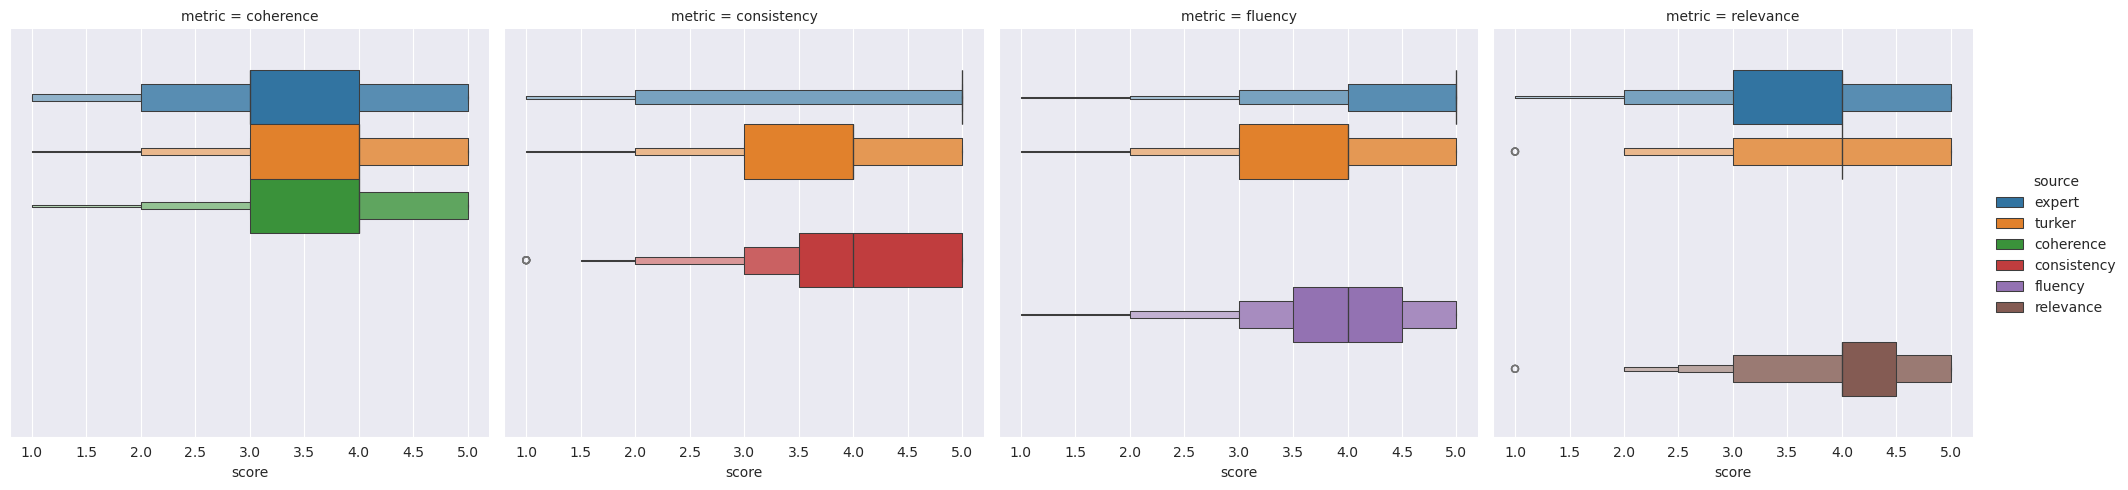

In [169]:
sns.catplot(data=df_melted, x='score', col='metric', kind='boxen', hue='source')

In [170]:

human_metrics = ['coherence', 'consistency', 'fluency', 'relevance']

In [171]:

df_overal['I(summary -> text) / H(text)'] = df_overal['I(summary -> text)'] / df_overal['H(text)']
# df_overal['I(text -> summary) / H(summary)'] = df_overal['I(text -> summary)'] / df_overal['H(summary)']


,coherence,consistency,fluency,relevance,I(summary -> text)
coherence,1.000000,0.289574,0.500173,0.589744,0.230769
consistency,0.289574,1.000000,0.608108,0.658123,0.526498
fluency,0.500173,0.608108,1.000000,0.763422,0.473848
relevance,0.589744,0.658123,0.763422,1.000000,0.538462
I(summary -> text),0.230769,0.526498,0.473848,0.538462,1.000000


|                    |   coherence |   consistency |   fluency |   relevance |   I(summary -> text) |
|:-------------------|------------:|--------------:|----------:|------------:|---------------------:|
| I(summary -> text) |    0.230769 |      0.526498 |  0.473848 |    0.538462 |                    1 |


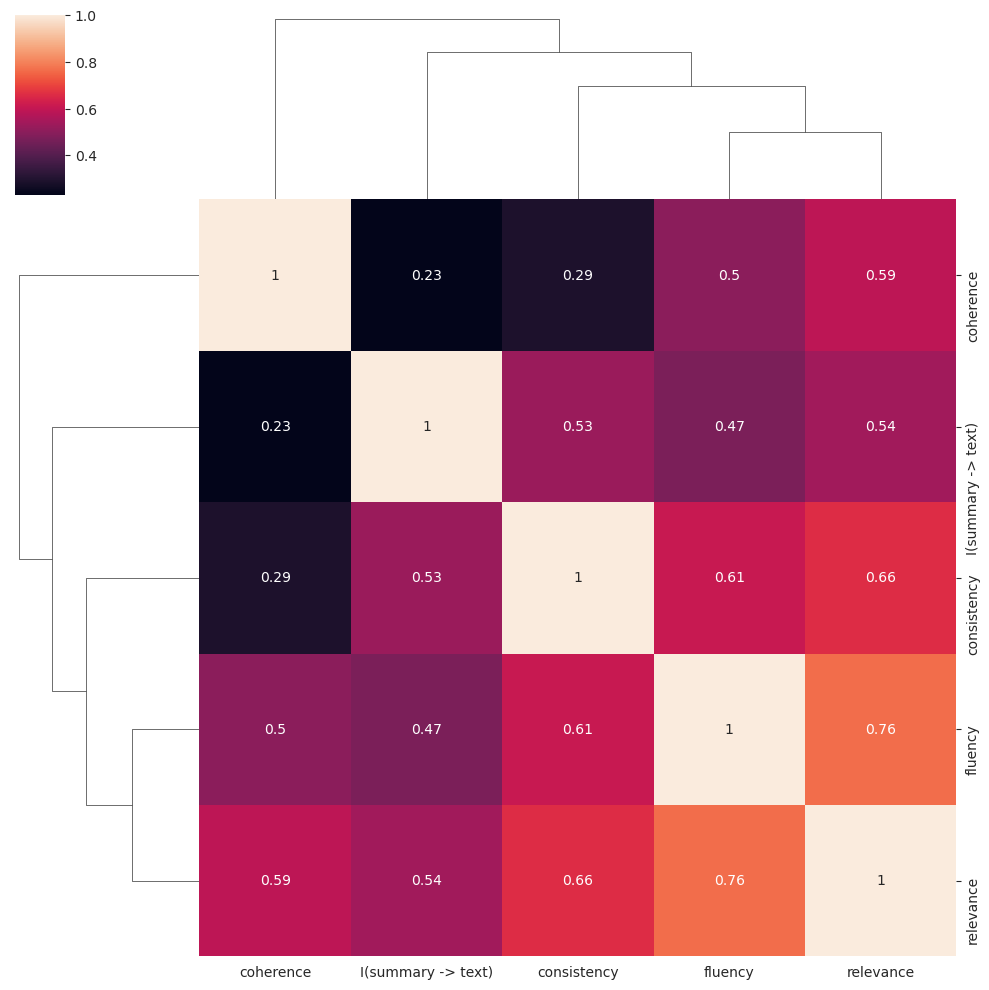

In [172]:
table_corr = df_overal[human_metrics + ['I(summary -> text)']].corr(method='kendall')

sns.clustermap(table_corr, annot=True)
display(table_corr)

print(table_corr.loc['I(summary -> text)', :].to_frame().transpose().to_markdown())

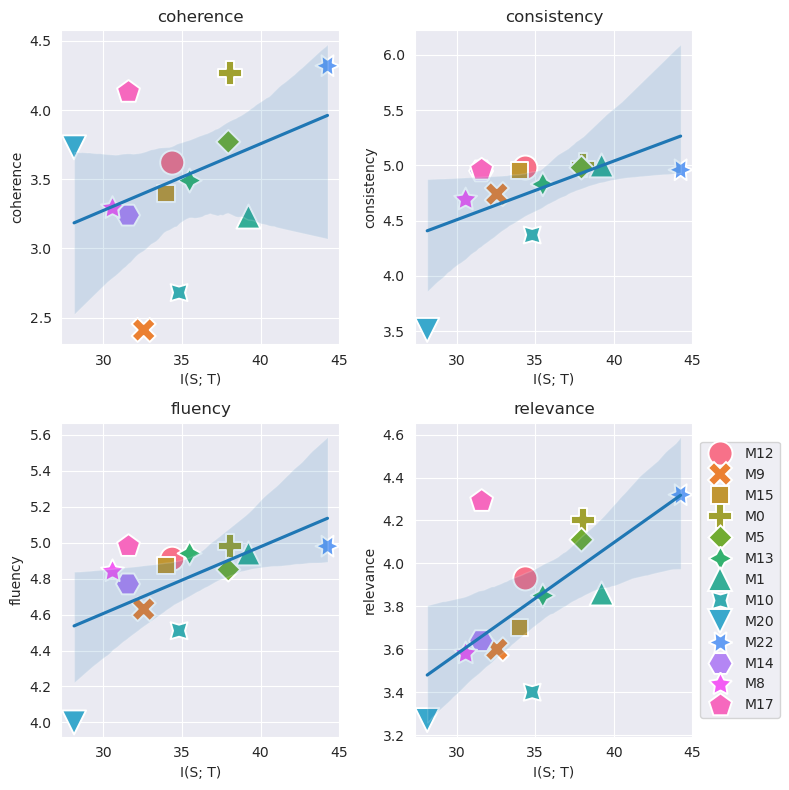

In [173]:
score=  'I(summary -> text)'

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

for i, metric in enumerate(human_metrics):
    sns.scatterplot(data=df_overal, x=score, y=metric, hue='filename', ax=ax[i//2, i%2], legend=True, style='filename', s=300)
    # add regression line
    sns.regplot(data=df_overal, x=score, y=metric, scatter=False, ax=ax[i//2, i%2])

    #  only for the last plot
    if i == len(human_metrics) - 1:
        ax[i//2, i%2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax[i//2, i%2].get_legend().remove()
    ax[i//2, i%2].set_title(metric)
    ax[i//2, i%2].set_xlabel('I(S; T)')
    ax[i//2, i%2].set_ylabel(metric)
    
fig.tight_layout()